# 1) Chicago Car Crash Project

### Introduction

### Business Problem Statement

### Objectives

### Experimental Design Taken

### 2) Load the Dataset

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, r2_score, recall_score, precision_score, roc_curve, roc_auc_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, plot_roc_curve

In [2]:
#load the dataset
crashes = pd.read_csv(r"C:\Users\wanji\OneDrive\Desktop\Traffic_Crashes_-_Crashes.csv", low_memory= False)
people = pd.read_csv(r"C:\Users\wanji\OneDrive\Desktop\Traffic_Crashes_-_People.csv",low_memory = False)
vehicles = pd.read_csv(r"C:\Users\wanji\OneDrive\Desktop\Traffic_Crashes_-_Vehicles.csv", low_memory = False)

In [3]:
# Merge the datsets
# Merge the datasets
merged_data = pd.merge(crashes, vehicles, on="CRASH_RECORD_ID", how="inner")
merged_data = pd.merge(merged_data, people, on="CRASH_RECORD_ID", how="inner")
merged_data.head()


,CRASH_RECORD_ID,RD_NO_x,CRASH_DATE_EST_I,CRASH_DATE_x,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,JC199149,NaN,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,JC199149,NaN,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,NaN,IMPROPER TURN,UNKNOWN,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
2,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,JC199149,NaN,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
3,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,JC199149,NaN,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,JC199149,NaN,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,...,NaN,IMPROPER TURN,UNKNOWN,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN


### 2.1) Providing the description of the dataset: Shape, Statistics and more additional info about the merged datasets

In [4]:
#Function to give the shape/general description of the dataset
def describe_merged_dataset(merged_data):
    # Shape of the dataset
    shape = merged_data.shape
    print("Shape of the dataset:", shape)

    statistics = merged_data.describe()
    print("\nBasic Statistics:")
    print(statistics)
    
    # Additional information
    print("\nAdditional Information:")
    merged_data.info()

# In this case for the merged datasets we are provided with the following information
describe_merged_dataset(merged_data)

Shape of the dataset: (3324249, 149)

Basic Statistics:
       POSTED_SPEED_LIMIT      LANE_CNT     STREET_NO  BEAT_OF_OCCURRENCE  \
count        3.324249e+06  9.306350e+05  3.324249e+06        3.324225e+06   
mean         2.892263e+01  9.342349e+00  3.638574e+03        1.232284e+03   
std          5.716456e+00  2.109722e+03  2.870519e+03        7.019735e+02   
min          0.000000e+00  0.000000e+00  0.000000e+00        1.110000e+02   
25%          3.000000e+01  2.000000e+00  1.201000e+03        7.130000e+02   
50%          3.000000e+01  2.000000e+00  3.160000e+03        1.134000e+03   
75%          3.000000e+01  4.000000e+00  5.529000e+03        1.814000e+03   
max          9.900000e+01  1.191625e+06  4.511000e+05        6.100000e+03   

          NUM_UNITS  INJURIES_TOTAL  INJURIES_FATAL  INJURIES_INCAPACITATING  \
count  3.324249e+06    3.324249e+06    3.324249e+06             3.324249e+06   
mean   2.198258e+00    3.069602e-01    1.938784e-03             3.134904e-02   
std    6.5

In [5]:
# Identifying the columns and the data types in the merged datasets
def describe_columns(merged_data):
    # Columns and their data types
    columns = merged_data.columns
    data_types = merged_data.dtypes
    
    # Create a DataFrame to store the information
    column_info = pd.DataFrame({'Column Name': columns, 'Data Type': data_types})
    
    # Print the column information
    print(column_info)

describe_columns(merged_data)

                             Column Name Data Type
CRASH_RECORD_ID          CRASH_RECORD_ID    object
RD_NO_x                          RD_NO_x    object
CRASH_DATE_EST_I        CRASH_DATE_EST_I    object
CRASH_DATE_x                CRASH_DATE_x    object
POSTED_SPEED_LIMIT    POSTED_SPEED_LIMIT     int64
...                                  ...       ...
PEDPEDAL_VISIBILITY  PEDPEDAL_VISIBILITY    object
PEDPEDAL_LOCATION      PEDPEDAL_LOCATION    object
BAC_RESULT                    BAC_RESULT    object
BAC_RESULT VALUE        BAC_RESULT VALUE   float64
CELL_PHONE_USE            CELL_PHONE_USE    object

[149 rows x 2 columns]


### 2.1.1) Data Cleaning

#### Calculating for the missing values 
- Show the number of missing values 
- The percentage of missing values for each column in the dataset.

In [6]:
def calculate_missing_values(merged_data):
    # Count the missing values in each column
    missing_values = merged_data.isnull().sum()

    # Calculate the percentage of missing values for each column
    missing_percentage = (missing_values / len(merged_data)) * 100

    # Create a DataFrame to store the missing values and percentages
    missing_data = pd.DataFrame({'Column': missing_values.index, 'Missing Values': missing_values.values, 'Missing Percentage': missing_percentage.values})

    return missing_data


# Calculate the missing values
missing_data = calculate_missing_values(merged_data)

# Print the missing data
missing_data.head()

,Column,Missing Values,Missing Percentage
0,CRASH_RECORD_ID,0,0.000000
1,RD_NO_x,22061,0.663639
2,CRASH_DATE_EST_I,3136129,94.340977
3,CRASH_DATE_x,0,0.000000
4,POSTED_SPEED_LIMIT,0,0.000000


#### Extracting the missing values at 95% which is greater than the threshold

In [7]:
def extract_missing_values(dataset, threshold, column_to_keep):
    # Calculate the missing values and percentages
    missing_data = calculate_missing_values(dataset)  

    # Extract the columns with missing values exceeding the threshold
    missing_above_threshold = missing_data[missing_data['Missing Percentage'] > threshold]

    # Get the list of columns to drop
    columns_to_drop = missing_above_threshold['Column'].tolist()

    # Remove the columns to keep from the list of columns to drop
    columns_to_drop = [col for col in columns_to_drop if col not in column_to_keep]

    # Drop the columns from the dataset
    dataset = dataset.drop(columns=columns_to_drop)

    return dataset

# Load the dataset
crashes

# Specify the columns to keep
column_to_keep = ['PEDPEDAL_VISIBILITY']

missing_data = calculate_missing_values(crashes)

# Print the missing_data dataframe to inspect the missing values and percentages
print(missing_data)

# Check the missing percentage specifically for the 'INJURIES_INCAPACITATING' column
missing_percentage_incapacitating = missing_data.loc[missing_data['Column'] == 'INJURIES_INCAPACITATING', 'Missing Percentage'].values[0]
print(f"Missing percentage for 'INJURIES_INCAPACITATING': {missing_percentage_incapacitating}%")

# Extract the columns with missing values exceeding 95% while retaining the specified columns
modified_data = extract_missing_values(crashes, 10, column_to_keep)

modified_data

                           Column  Missing Values  Missing Percentage
0                 CRASH_RECORD_ID               0            0.000000
1                           RD_NO            4627            0.639565
2                CRASH_DATE_EST_I          668767           92.440080
3                      CRASH_DATE               0            0.000000
4              POSTED_SPEED_LIMIT               0            0.000000
5          TRAFFIC_CONTROL_DEVICE               0            0.000000
6                DEVICE_CONDITION               0            0.000000
7               WEATHER_CONDITION               0            0.000000
8              LIGHTING_CONDITION               0            0.000000
9                FIRST_CRASH_TYPE               0            0.000000
10                TRAFFICWAY_TYPE               0            0.000000
11                       LANE_CNT          524458           72.493020
12                      ALIGNMENT               0            0.000000
13           ROADWAY

,CRASH_RECORD_ID,RD_NO,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,JC199149,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,...,0.0,1.0,2.0,0.0,14,2,3,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337)
1,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,JB422857,09/05/2018 08:40:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,...,0.0,0.0,2.0,0.0,8,4,9,41.968562,-87.740659,POINT (-87.740659314632 41.968562453871)
2,0115ade9a755e835255508463f7e9c4a9a0b47e9304238...,JF318029,07/15/2022 12:45:00 AM,30,UNKNOWN,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,NOT DIVIDED,...,0.0,0.0,2.0,0.0,0,6,7,41.886336,-87.716203,POINT (-87.716203130599 41.886336409761)
3,017040c61958d2fa977c956b2bd2d6759ef7754496dc96...,JF324552,07/15/2022 06:50:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,...,0.0,0.0,2.0,0.0,18,6,7,41.925111,-87.667997,POINT (-87.667997321599 41.925110815832)
4,78eee027ec3dcc85d36c9e3fdae4729dcc56440105d65b...,JB291672,06/03/2018 05:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,UNKNOWN,PARKED MOTOR VEHICLE,ONE-WAY,...,0.0,0.0,1.0,0.0,17,1,6,41.910758,-87.731389,POINT (-87.731388754145 41.910757551599)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723455,722625096bc7b56c15fee9e09f4f1901fc5e25b8aacf2b...,JG251187,04/27/2023 05:47:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,OTHER,...,0.0,0.0,5.0,0.0,17,5,4,41.822237,-87.606996,POINT (-87.606995789103 41.822236685692)
723456,2d47afb7c4f2f4d305fddccb682ce850452476cc7f910d...,NaN,05/13/2023 03:54:00 PM,35,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,UNKNOWN,UNKNOWN,TURNING,NOT DIVIDED,...,0.0,0.0,2.0,0.0,15,7,5,41.852761,-87.625645,POINT (-87.625645007251 41.85276094394)
723457,4b1e7cbdb519f7f83fa3e3eae095ff54aebb73f125cf06...,NaN,05/11/2023 05:45:00 PM,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,UNKNOWN,UNKNOWN,ANGLE,NOT DIVIDED,...,0.0,0.0,4.0,0.0,17,5,5,41.891311,-87.646244,POINT (-87.646244110744 41.891311456709)
723458,5d3f02a062e775ef527557f75c4ded6900d21ad7108a3a...,NaN,05/13/2023 03:14:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,FOUR WAY,...,2.0,0.0,2.0,0.0,3,7,5,41.809485,-87.606711,POINT (-87.606710818433 41.809485427538)


In [8]:
# Identifying the columns and the data types in the merged datasets
def describe_columns(merged_data):
    # Columns and their data types
    columns = merged_data.columns
    data_types = merged_data.dtypes
    
    # Create a DataFrame to store the information
    column_info = pd.DataFrame({'Column Name': columns, 'Data Type': data_types})
    
    # Print the column information
    print(column_info)

describe_columns(merged_data)

                             Column Name Data Type
CRASH_RECORD_ID          CRASH_RECORD_ID    object
RD_NO_x                          RD_NO_x    object
CRASH_DATE_EST_I        CRASH_DATE_EST_I    object
CRASH_DATE_x                CRASH_DATE_x    object
POSTED_SPEED_LIMIT    POSTED_SPEED_LIMIT     int64
...                                  ...       ...
PEDPEDAL_VISIBILITY  PEDPEDAL_VISIBILITY    object
PEDPEDAL_LOCATION      PEDPEDAL_LOCATION    object
BAC_RESULT                    BAC_RESULT    object
BAC_RESULT VALUE        BAC_RESULT VALUE   float64
CELL_PHONE_USE            CELL_PHONE_USE    object

[149 rows x 2 columns]


In [9]:
merged_data.drop(['INJURIES_INCAPACITATING'], axis=1, inplace=True)

In [10]:
merged_data.drop(['INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT','INJURIES_NO_INDICATION','INJURIES_UNKNOWN','INJURIES_FATAL','CRASH_DATE_EST_I','LANE_CNT','PEDPEDAL_ACTION','PEDPEDAL_VISIBILITY','BAC_RESULT','BAC_RESULT VALUE','CELL_PHONE_USE'],axis =1, inplace=True)

In [11]:
merged_data

,CRASH_RECORD_ID,RD_NO_x,CRASH_DATE_x,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,AIRBAG_DEPLOYED,EJECTION,INJURY_CLASSIFICATION,HOSPITAL,EMS_AGENCY,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_LOCATION
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,JC199149,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,...,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,JC199149,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,...,DID NOT DEPLOY,NONE,"REPORTED, NOT EVIDENT",REFUSED,AMB 28,NaN,IMPROPER TURN,UNKNOWN,NORMAL,NaN
2,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,JC199149,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,...,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,REFUSED,NaN,NaN,NONE,NOT OBSCURED,NORMAL,NaN
3,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,JC199149,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,...,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,JC199149,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,...,DID NOT DEPLOY,NONE,"REPORTED, NOT EVIDENT",REFUSED,AMB 28,NaN,IMPROPER TURN,UNKNOWN,NORMAL,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3324244,5d3f02a062e775ef527557f75c4ded6900d21ad7108a3a...,NaN,05/13/2023 03:14:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,FOUR WAY,...,"DEPLOYED, COMBINATION",NONE,NONINCAPACITATING INJURY,UNIVERSITY OF CHICAGO,57,NaN,NONE,UNKNOWN,NORMAL,NaN
3324245,5d3f02a062e775ef527557f75c4ded6900d21ad7108a3a...,NaN,05/13/2023 03:14:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,FOUR WAY,...,"DEPLOYED, FRONT",NONE,NO INDICATION OF INJURY,REFUSED,CFD,57,NaN,NaN,NaN,NaN
3324246,5d3f02a062e775ef527557f75c4ded6900d21ad7108a3a...,NaN,05/13/2023 03:14:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,FOUR WAY,...,"DEPLOYED, COMBINATION",NONE,NONINCAPACITATING INJURY,UNIVERSITY OF CHICAGO,CFD,57,NaN,NaN,NaN,NaN
3324247,2d53e3705a5b2f13c9684cdc99c3ab976c88a9e1ae7239...,NaN,05/13/2023 03:21:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,OTHER,...,NOT APPLICABLE,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,OTHER,NOT OBSCURED,NORMAL,NaN


In [12]:
merged_data.isnull().sum()

CRASH_RECORD_ID                 0
RD_NO_x                     22061
CRASH_DATE_x                    0
POSTED_SPEED_LIMIT              0
TRAFFIC_CONTROL_DEVICE          0
                           ...   
EMS_RUN_NO                3263906
DRIVER_ACTION              685262
DRIVER_VISION              686287
PHYSICAL_CONDITION         683287
PEDPEDAL_LOCATION         3261073
Length: 136, dtype: int64

In [13]:
merged_data['datetime'] = pd.to_datetime(merged_data['CRASH_DATE'])

In [14]:
merged_data['CRASH_MONTH'] = merged_data['datetime'].dt.month
merged_data['CRASH_DAY_OF_WEEK'] = merged_data['datetime'].dt.day
merged_data['CRASH_HOUR'] = merged_data['datetime'].dt.hour

In [15]:
merged_data.drop(['LOCATION', 'datetime', 'CRASH_DATE', 'CRASH_RECORD_ID','LATITUDE', 'LONGITUDE',], axis=1, inplace=True)

### One hot Encoding for first_crash_type

In [16]:
# To know which columns to perofrm one hot encoding , we need to identify categorical columns

categorical_columns = []
for column in merged_data.columns:
    if merged_data[column].nunique() > 2 and merged_data[column].dtype == 'object':
        categorical_columns.append(column)

categorical_columns


['RD_NO_x',
 'CRASH_DATE_x',
 'TRAFFIC_CONTROL_DEVICE',
 'DEVICE_CONDITION',
 'WEATHER_CONDITION',
 'LIGHTING_CONDITION',
 'FIRST_CRASH_TYPE',
 'TRAFFICWAY_TYPE',
 'ALIGNMENT',
 'ROADWAY_SURFACE_COND',
 'ROAD_DEFECT',
 'REPORT_TYPE',
 'DAMAGE',
 'DATE_POLICE_NOTIFIED',
 'PRIM_CONTRIBUTORY_CAUSE',
 'SEC_CONTRIBUTORY_CAUSE',
 'STREET_DIRECTION',
 'STREET_NAME',
 'WORK_ZONE_TYPE',
 'MOST_SEVERE_INJURY',
 'RD_NO_y',
 'CRASH_DATE_y',
 'UNIT_TYPE',
 'MAKE',
 'MODEL',
 'LIC_PLATE_STATE',
 'VEHICLE_DEFECT',
 'VEHICLE_TYPE',
 'VEHICLE_USE',
 'TRAVEL_DIRECTION',
 'MANEUVER',
 'TOWED_BY',
 'TOWED_TO',
 'FIRST_CONTACT_POINT',
 'USDOT_NO',
 'CCMC_NO',
 'ILCC_NO',
 'COMMERCIAL_SRC',
 'GVWR',
 'CARRIER_NAME',
 'CARRIER_STATE',
 'CARRIER_CITY',
 'HAZMAT_NAME',
 'UN_NO',
 'HAZMAT_PRESENT_I',
 'HAZMAT_REPORT_I',
 'MCS_REPORT_I',
 'MCS_REPORT_NO',
 'HAZMAT_VIO_CAUSE_CRASH_I',
 'MCS_VIO_CAUSE_CRASH_I',
 'IDOT_PERMIT_NO',
 'TRAILER1_WIDTH',
 'TRAILER2_WIDTH',
 'VEHICLE_CONFIG',
 'CARGO_BODY_TYPE',
 'LOAD_T

In [17]:
def get_categorical_columns(dataframe):
    categorical_columns = dataframe.select_dtypes(include=['object', 'category']).columns.tolist()
    return categorical_columns

# Example usage
categorical_cols = get_categorical_columns(merged_data)
categorical_cols


['RD_NO_x',
 'CRASH_DATE_x',
 'TRAFFIC_CONTROL_DEVICE',
 'DEVICE_CONDITION',
 'WEATHER_CONDITION',
 'LIGHTING_CONDITION',
 'FIRST_CRASH_TYPE',
 'TRAFFICWAY_TYPE',
 'ALIGNMENT',
 'ROADWAY_SURFACE_COND',
 'ROAD_DEFECT',
 'REPORT_TYPE',
 'CRASH_TYPE',
 'INTERSECTION_RELATED_I',
 'NOT_RIGHT_OF_WAY_I',
 'HIT_AND_RUN_I',
 'DAMAGE',
 'DATE_POLICE_NOTIFIED',
 'PRIM_CONTRIBUTORY_CAUSE',
 'SEC_CONTRIBUTORY_CAUSE',
 'STREET_DIRECTION',
 'STREET_NAME',
 'PHOTOS_TAKEN_I',
 'STATEMENTS_TAKEN_I',
 'DOORING_I',
 'WORK_ZONE_I',
 'WORK_ZONE_TYPE',
 'WORKERS_PRESENT_I',
 'MOST_SEVERE_INJURY',
 'RD_NO_y',
 'CRASH_DATE_y',
 'UNIT_TYPE',
 'CMRC_VEH_I',
 'MAKE',
 'MODEL',
 'LIC_PLATE_STATE',
 'VEHICLE_DEFECT',
 'VEHICLE_TYPE',
 'VEHICLE_USE',
 'TRAVEL_DIRECTION',
 'MANEUVER',
 'TOWED_I',
 'FIRE_I',
 'EXCEED_SPEED_LIMIT_I',
 'TOWED_BY',
 'TOWED_TO',
 'AREA_00_I',
 'AREA_01_I',
 'AREA_02_I',
 'AREA_03_I',
 'AREA_04_I',
 'AREA_05_I',
 'AREA_06_I',
 'AREA_07_I',
 'AREA_08_I',
 'AREA_09_I',
 'AREA_10_I',
 'AREA_1

### Inspecting the values in each column 



In [18]:
for col in merged_data.columns:
    try:
        print(col, merged_data[col].value_counts(dropna=False)[:10])
    except:
        print(col, merged_data[col].value_counts())
        # If there aren't 5+ unique values for a column the first print statement
        
        # will throw an error for an invalid idx slice
    print('\n') # Break up the output between columns

RD_NO_x NaN         22061
JC461568      192
JD200579      156
JD258344      154
JF485483      153
JG129804      144
JF346755      144
JB253311      138
JA522872      130
JB187770      122
Name: RD_NO_x, dtype: int64


CRASH_DATE_x 10/05/2019 10:08:00 PM    192
11/23/2022 05:00:00 PM    161
06/09/2020 05:30:00 AM    156
04/02/2020 05:44:00 PM    156
12/29/2020 05:00:00 PM    146
05/07/2018 09:35:00 AM    144
01/26/2023 06:35:00 AM    144
08/06/2022 02:48:00 PM    144
11/10/2017 10:30:00 AM    138
11/23/2017 04:14:00 PM    130
Name: CRASH_DATE_x, dtype: int64


POSTED_SPEED_LIMIT 30    2534235
35     239385
25     184564
20     111026
15      86243
10      54586
40      38850
0       28409
45      24898
5       14815
Name: POSTED_SPEED_LIMIT, dtype: int64


TRAFFIC_CONTROL_DEVICE NO CONTROLS               1685572
TRAFFIC SIGNAL            1101201
STOP SIGN/FLASHER          376111
UNKNOWN                    111570
OTHER                       20768
LANE USE MARKING             6039
YIELD  

## Creating bins for crash_hour

In [19]:
# observing values of crash_hour
merged_data.CRASH_HOUR.value_counts()

16    272444
15    270763
17    264997
14    228866
18    217542
13    204474
12    192432
8     171863
11    163576
19    157157
9     142451
10    142229
7     138710
20    123379
21    111666
22    100950
23     84322
0      66032
6      63494
1      55681
2      46586
5      37494
3      36051
4      31090
Name: CRASH_HOUR, dtype: int64

## Creating bins for age 

In [20]:
merged_data.AGE.value_counts()

 25.0     67156
 27.0     66867
 26.0     66667
 28.0     65257
 24.0     64906
          ...  
-47.0         4
-177.0        4
-49.0         2
 106.0        2
-40.0         2
Name: AGE, Length: 116, dtype: int64

In [21]:
# creating bins and labels, preview data
merged_data['age_bins'] = pd.cut(x=merged_data['AGE'], bins = [0,15,24,35,55,100], 
                         labels = ['16 - Under-aged', '17-24', 
                        '25-30', '34-57','58+'])
merged_data.head()

,RD_NO_x,CRASH_DATE_x,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,...,EJECTION,INJURY_CLASSIFICATION,HOSPITAL,EMS_AGENCY,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_LOCATION,age_bins
0,JC199149,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,STRAIGHT AND LEVEL,...,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25-30
1,JC199149,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,STRAIGHT AND LEVEL,...,NONE,"REPORTED, NOT EVIDENT",REFUSED,AMB 28,NaN,IMPROPER TURN,UNKNOWN,NORMAL,NaN,17-24
2,JC199149,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,STRAIGHT AND LEVEL,...,NONE,NO INDICATION OF INJURY,REFUSED,NaN,NaN,NONE,NOT OBSCURED,NORMAL,NaN,58+
3,JC199149,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,STRAIGHT AND LEVEL,...,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25-30
4,JC199149,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,STRAIGHT AND LEVEL,...,NONE,"REPORTED, NOT EVIDENT",REFUSED,AMB 28,NaN,IMPROPER TURN,UNKNOWN,NORMAL,NaN,17-24


# Creating bins for time 

In [22]:
# creating bins for times 
# 0-6 = Late Night/Early Morning 
# 6-12 = Morning 
# 12-18 = Afternoon/Rush Hour
# 18-23 = Late Evening 
modified_data['time_bins'] = pd.cut(x=modified_data['CRASH_HOUR'], bins = [0,6,12,18,23], labels = ['Late Night/Early Morning','Morning', 'Afternoon/Rush Hour','Late Evening'])
modified_data.head()

,CRASH_RECORD_ID,RD_NO,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION,time_bins
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,JC199149,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,...,1.0,2.0,0.0,14,2,3,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337),Afternoon/Rush Hour
1,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,JB422857,09/05/2018 08:40:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,...,0.0,2.0,0.0,8,4,9,41.968562,-87.740659,POINT (-87.740659314632 41.968562453871),Morning
2,0115ade9a755e835255508463f7e9c4a9a0b47e9304238...,JF318029,07/15/2022 12:45:00 AM,30,UNKNOWN,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,NOT DIVIDED,...,0.0,2.0,0.0,0,6,7,41.886336,-87.716203,POINT (-87.716203130599 41.886336409761),NaN
3,017040c61958d2fa977c956b2bd2d6759ef7754496dc96...,JF324552,07/15/2022 06:50:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,...,0.0,2.0,0.0,18,6,7,41.925111,-87.667997,POINT (-87.667997321599 41.925110815832),Afternoon/Rush Hour
4,78eee027ec3dcc85d36c9e3fdae4729dcc56440105d65b...,JB291672,06/03/2018 05:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,UNKNOWN,PARKED MOTOR VEHICLE,ONE-WAY,...,0.0,1.0,0.0,17,1,6,41.910758,-87.731389,POINT (-87.731388754145 41.910757551599),Afternoon/Rush Hour


### Create post_speed_limit bins

In [23]:
modified_data.POSTED_SPEED_LIMIT.value_counts()

30    531922
35     48545
25     45547
20     30169
15     25586
10     16682
0       7294
40      7006
45      4713
5       4423
55       716
50       184
3        165
9         95
39        74
99        66
60        44
1         39
24        36
2         26
32        17
65        17
34        14
33        13
11        11
6          7
26         6
36         5
7          5
70         4
22         3
14         3
12         3
29         3
8          2
4          2
31         2
23         2
38         2
18         2
44         1
63         1
62         1
16         1
49         1
Name: POSTED_SPEED_LIMIT, dtype: int64

In [24]:
# we create the bins and label for better preview
# creating bins and label, previewing data 
modified_data['post_speed'] = pd.cut(x=modified_data['POSTED_SPEED_LIMIT'], bins = [0,15,25,40,75], labels = ['0-15', '16-25', '26-40', '41+'])
modified_data.head()

,CRASH_RECORD_ID,RD_NO,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION,time_bins,post_speed
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,JC199149,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,...,2.0,0.0,14,2,3,41.884547,-87.641201,POINT (-87.64120093714 41.884547224337),Afternoon/Rush Hour,26-40
1,792b539deaaad65ee5b4a9691d927a34d298eb33d42af0...,JB422857,09/05/2018 08:40:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,...,2.0,0.0,8,4,9,41.968562,-87.740659,POINT (-87.740659314632 41.968562453871),Morning,26-40
2,0115ade9a755e835255508463f7e9c4a9a0b47e9304238...,JF318029,07/15/2022 12:45:00 AM,30,UNKNOWN,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",ANGLE,NOT DIVIDED,...,2.0,0.0,0,6,7,41.886336,-87.716203,POINT (-87.716203130599 41.886336409761),NaN,26-40
3,017040c61958d2fa977c956b2bd2d6759ef7754496dc96...,JF324552,07/15/2022 06:50:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,...,2.0,0.0,18,6,7,41.925111,-87.667997,POINT (-87.667997321599 41.925110815832),Afternoon/Rush Hour,26-40
4,78eee027ec3dcc85d36c9e3fdae4729dcc56440105d65b...,JB291672,06/03/2018 05:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,UNKNOWN,PARKED MOTOR VEHICLE,ONE-WAY,...,1.0,0.0,17,1,6,41.910758,-87.731389,POINT (-87.731388754145 41.910757551599),Afternoon/Rush Hour,26-40


In [25]:
contributory_causes = merged_data['PRIM_CONTRIBUTORY_CAUSE'].unique()
print(contributory_causes)


['IMPROPER TURNING/NO SIGNAL'
 'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)'
 'UNABLE TO DETERMINE' 'NOT APPLICABLE' 'IMPROPER LANE USAGE' 'WEATHER'
 'DISREGARDING TRAFFIC SIGNALS' 'FAILING TO YIELD RIGHT-OF-WAY'
 'FOLLOWING TOO CLOSELY'
 'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)'
 'TURNING RIGHT ON RED' 'IMPROPER BACKING'
 'CELL PHONE USE OTHER THAN TEXTING'
 'FAILING TO REDUCE SPEED TO AVOID CRASH' 'IMPROPER OVERTAKING/PASSING'
 'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE' 'EQUIPMENT - VEHICLE CONDITION'
 'DISTRACTION - FROM INSIDE VEHICLE' 'DISTRACTION - FROM OUTSIDE VEHICLE'
 'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER'
 'DISREGARDING ROAD MARKINGS' 'DISREGARDING STOP SIGN'
 'DISREGARDING OTHER TRAFFIC SIGNS' 'EXCEEDING AUTHORIZED SPEED LIMIT'
 'PHYSICAL CONDITION OF DRIVER' 'RELATED TO BUS STOP'
 'DRIVING ON WRONG SIDE/WRONG WAY' 'ROAD CONSTRUCTION/MAINTENANCE'
 'ROAD ENGINEERING/SURFACE/MARKING DEFECTS' 'ANIMAL'
 '

In [26]:
unique_values = merged_data['PRIM_CONTRIBUTORY_CAUSE'].unique()

In [27]:
# Define the mapping dictionary
mapping_dict = {
    'Driver Inattention/Distraction': 'Inattention/Distraction',
    'Failure to Yield Right-of-Way': 'Failure to Yield',
    'Other': 'Other',
    # Add more mappings as needed
}

# Apply the mapping
merged_data['Contributory_Cause_Bins'] = merged_data['PRIM_CONTRIBUTORY_CAUSE'].map(mapping_dict)


In [28]:
merged_data['PRIM_CONTRIBUTORY_CAUSE'] = pd.to_numeric(merged_data['PRIM_CONTRIBUTORY_CAUSE'], errors='coerce')
bins = [0, 3, 6, 9, 12]
labels = ['Low', 'Medium', 'High', 'Very High']
merged_data['Contributory_Cause_Bins'] = pd.cut(merged_data['PRIM_CONTRIBUTORY_CAUSE'], bins=bins, labels=labels)


In [29]:
# Define the bins
bins = [0, 3, 6, 9, 12]  # Example bins, adjust them according to your needs

# Create the bin labels
labels = ['Low', 'Medium', 'High', 'Very High']  # Example labels, adjust them according to your needs

# Apply binning to the column
merged_data['Contributory_Cause_Bins'] = pd.cut(merged_data['PRIM_CONTRIBUTORY_CAUSE'], bins=bins, labels=labels)

merged_data.head()

,RD_NO_x,CRASH_DATE_x,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,...,INJURY_CLASSIFICATION,HOSPITAL,EMS_AGENCY,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_LOCATION,age_bins,Contributory_Cause_Bins
0,JC199149,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,STRAIGHT AND LEVEL,...,NO INDICATION OF INJURY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25-30,NaN
1,JC199149,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,STRAIGHT AND LEVEL,...,"REPORTED, NOT EVIDENT",REFUSED,AMB 28,NaN,IMPROPER TURN,UNKNOWN,NORMAL,NaN,17-24,NaN
2,JC199149,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,STRAIGHT AND LEVEL,...,NO INDICATION OF INJURY,REFUSED,NaN,NaN,NONE,NOT OBSCURED,NORMAL,NaN,58+,NaN
3,JC199149,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,STRAIGHT AND LEVEL,...,NO INDICATION OF INJURY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25-30,NaN
4,JC199149,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,STRAIGHT AND LEVEL,...,"REPORTED, NOT EVIDENT",REFUSED,AMB 28,NaN,IMPROPER TURN,UNKNOWN,NORMAL,NaN,17-24,NaN


In [30]:
# Perform some data cleaning in traffic-control_device
def clean_columns(dataframe, columns):
    cleaned_df = dataframe.copy()
    
    for column in columns:
        cleaned_df[column] = cleaned_df[column].str.strip().fillna('Unknown').str.upper()
    
    return cleaned_df

# Example usage
columns_to_clean = ['TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION', 'FIRST_CRASH_TYPE',
                    'ROAD_DEFECT']

cleaned_data = clean_columns(merged_data, columns_to_clean)


## Clean both device control and traffic control device

In [31]:
# Define the mappings
traffic_control_map = {
    'NO CONTROLS': 'NO CONTROLS',
    'TRAFFIC SIGNAL': 'TRAFFIC SIGNAL/SIGN',
    'STOP SIGN/FLASHER': 'TRAFFIC SIGNAL/SIGN',
    'UNKNOWN': 'UNKNOWN/OTHER',
    'OTHER': 'UNKNOWN/OTHER',
    'YIELD': 'UNKNOWN/OTHER',
    'SCHOOL ZONE': 'UNKNOWN/OTHER'
}

device_map = {
    'NO CONTROLS': 'NO CONTROLS',
    'FUNCTIONING PROPERLY': 'FUNCTIONING PROPERLY',
    'UNKNOWN': 'NOT FUNCTIONING/UNKNOWN',
    'OTHER': 'NOT FUNCTIONING/UNKNOWN',
    'FUNCTIONING IMPROPERLY': 'NOT FUNCTIONING/UNKNOWN',
    'NOT FUNCTIONING': 'NOT FUNCTIONING/UNKNOWN'
}

# Apply the mappings using replace()
merged_data['TRAFFIC_CONTROL_DEVICE'] = merged_data['TRAFFIC_CONTROL_DEVICE'].replace(traffic_control_map)

print(merged_data['TRAFFIC_CONTROL_DEVICE'].value_counts())

print(merged_data['DEVICE_CONDITION'].value_counts())
merged_data['DEVICE_CONDITION'] = merged_data['DEVICE_CONDITION'].replace(device_map)

# Check the value counts after mapping




NO CONTROLS                 1685572
TRAFFIC SIGNAL/SIGN         1477312
UNKNOWN/OTHER                139158
LANE USE MARKING               6039
OTHER REG. SIGN                3300
OTHER WARNING SIGN             2470
RAILROAD CROSSING GATE         2427
PEDESTRIAN CROSSING SIGN       2156
DELINEATORS                    1455
FLASHING CONTROL SIGNAL        1414
POLICE/FLAGMAN                 1298
OTHER RAILROAD CROSSING         812
RR CROSSING SIGN                500
NO PASSING                      235
BICYCLE CROSSING SIGN           101
Name: TRAFFIC_CONTROL_DEVICE, dtype: int64
NO CONTROLS                 1718621
FUNCTIONING PROPERLY        1351556
UNKNOWN                      197050
OTHER                         26369
FUNCTIONING IMPROPERLY        18354
NOT FUNCTIONING               10710
WORN REFLECTIVE MATERIAL       1171
MISSING                         418
Name: DEVICE_CONDITION, dtype: int64


## Clean weather condition

In [32]:
merged_data.WEATHER_CONDITION.value_counts()

# defining dictionary map and remapping
weather_map = {'CLEAR': 'CLEAR',
                'RAIN': 'RAIN/CLOUDY/OTHER',
                'CLOUDY/OVERCAST': 'RAIN/CLOUDY/OTHER',
                'UNKNOWN': 'RAIN/CLOUDY/OTHER',
                'OTHER ': 'RAIN/CLOUDY/OTHER'}

merged_data.WEATHER_CONDITION = merged_data.WEATHER_CONDITION.map(weather_map)
merged_data.WEATHER_CONDITION.value_counts()

CLEAR                2644677
RAIN/CLOUDY/OTHER     535858
Name: WEATHER_CONDITION, dtype: int64

## Clean first_crash_type

In [33]:
merged_data.FIRST_CRASH_TYPE.value_counts()


# defining dictionary map and remapping
crash_map = {'PEDESTRIAN': 'PED/CYCLIST',
                'PEDALCYCLIST': 'PED/CYCLIST',
                'REAR END': 'REAR END',
                'SIDESWIPE SAME DIRECTION': 'SIDESWIPE',
                'TURNING': 'TURNING/ANGLE',
                'ANGLE': 'TURNING/ANGLE',
                'PARKED MOTOR VEHICLE': 'PARKED/FIXED',
                'FIXED OBJECT': 'PARKED/FIXED',
                'REAR TO SIDE': 'OTHER',
                'SIDESWIPE OPPOSITE DIRECTION ': 'SIDESWIPE',
                'HEAD ON': 'OTHER',
                'OTHER OBJECT': 'OTHER',
                'REAR TO REAR': 'OTHER',
                'OTHER NONCOLLISION': 'OTHER'}

merged_data.FIRST_CRASH_TYPE = merged_data.FIRST_CRASH_TYPE.map(crash_map)
merged_data.FIRST_CRASH_TYPE.value_counts()

TURNING/ANGLE    1006367
REAR END          944438
SIDESWIPE         573822
PARKED/FIXED      504545
PED/CYCLIST       124757
OTHER              78896
Name: FIRST_CRASH_TYPE, dtype: int64

In [34]:
merged_data.TRAFFICWAY_TYPE.value_counts()


# defining dictionary map and remapping
traffic_map = {'NOT DIVIDED': 'NOT DIVIDED',
                'DIVIDED - W/MEDIAN (NOT RAISED)': 'DIVIDED',
                'ONE-WAY': 'ONE-WAY',
                'FOUR WAY': 'FOUR WAY',
                'PARKING LOT': 'PARKING LOT',
                'DIVIDED - W/MEDIAN BARRIER': 'DIVIDED',
                'ALLEY': 'ALLEY/OTHER',
                'OTHER': 'ALLEY/OTHER',
                'CENTER TURN LANE': 'ALLEY/OTHER',
                'Y-INTERSECTION': 'ALLEY/OTHER',
                'T-INTERSECTION': 'ALLEY/OTHER',
                'UNKNOWN': 'UNKNOWN',
                'NOT REPORTED': 'UNKNOWN',
                'UNKNOWN INTERSECTION TYPE': 'UNKNOWN'}

merged_data.TRAFFICWAY_TYPE = merged_data.TRAFFICWAY_TYPE.map(traffic_map)
merged_data.TRAFFICWAY_TYPE.value_counts()

NOT DIVIDED    1490567
DIVIDED         809806
ONE-WAY         355509
FOUR WAY        226319
ALLEY/OTHER     200749
PARKING LOT     166778
UNKNOWN          46178
Name: TRAFFICWAY_TYPE, dtype: int64

In [35]:
merged_data.ROAD_DEFECT.value_counts()

# defining dictionary map and remapping
defect_map = {'NO DEFECTS': 'NO DEFECTS',
                'UNKNOWN': 'UNKNOWN/OTHER',
                'OTHER': 'UNKNOWN/OTHER',
                'SHOULDER DEFECT': 'UNKNOWN/OTHER'}

merged_data.ROAD_DEFECT= merged_data.ROAD_DEFECT.map(defect_map)
merged_data.ROAD_DEFECT.value_counts()

NO DEFECTS       2740674
UNKNOWN/OTHER     553148
Name: ROAD_DEFECT, dtype: int64

In [36]:
merged_data.DRIVER_VISION.value_counts()

NOT OBSCURED              1364959
UNKNOWN                   1209245
OTHER                       25948
MOVING VEHICLES             15225
PARKED VEHICLES              9395
WINDSHIELD (WATER/ICE)       7339
BLINDED - SUNLIGHT           3110
TREES, PLANTS                1022
BUILDINGS                     882
BLINDED - HEADLIGHTS          248
HILLCREST                     184
BLOWING MATERIALS             176
EMBANKMENT                    161
SIGNBOARD                      68
Name: DRIVER_VISION, dtype: int64

In [37]:
# defining dictionary map and remapping
driver_map = {'NOT OBSCURED': 'NOT OBSCURED',
                'UNKNOWN': 'UNKNOWN',
                'OTHER': 'OBSCURED',
                'PARKED VEHICLES': 'OBSCURED',
                'MOVING VEHICLES': 'OBSCURED',
                'BLINDED - SUNLIGHT': 'OBSCURED'}

people.DRIVER_VISION = people.DRIVER_VISION.map(driver_map)
people.DRIVER_VISION.value_counts()

NOT OBSCURED    651566
UNKNOWN         579029
OBSCURED         26195
Name: DRIVER_VISION, dtype: int64

In [38]:
merged_data.SAFETY_EQUIPMENT.value_counts()

SAFETY BELT USED                              1592372
USAGE UNKNOWN                                 1535861
NONE PRESENT                                   106549
SAFETY BELT NOT USED                            18332
CHILD RESTRAINT USED                            16508
HELMET NOT USED                                 13668
CHILD RESTRAINT - FORWARD FACING                 7835
BICYCLE HELMET (PEDACYCLIST INVOLVED ONLY)       5341
CHILD RESTRAINT - TYPE UNKNOWN                   4026
CHILD RESTRAINT - REAR FACING                    3713
HELMET USED                                      2727
BOOSTER SEAT                                     2039
DOT COMPLIANT MOTORCYCLE HELMET                  2026
CHILD RESTRAINT NOT USED                         1539
SHOULD/LAP BELT USED IMPROPERLY                   422
NOT DOT COMPLIANT MOTORCYCLE HELMET               372
WHEELCHAIR                                        362
CHILD RESTRAINT USED IMPROPERLY                   261
STRETCHER                   

In [39]:
merged_data.SAFETY_EQUIPMENT.value_counts()
# defining dictionary map and remapping
safety_map = {'USAGE UNKNOWN': 'USAGE UNKNOWN',
                'SAFETY BELT USED': 'SAFETY EQUIPMENT USED',
                'NONE PRESENT': 'NONE PRESENT/USED',
                'BICYCLE HELMET (PEDACYCLIST INVOLVED ONLY)': 'SAFETY EQUIPMENT USED',
                'HELMET NOT USED': 'NONE PRESENT/USED',
                'SAFETY BELT NOT USED': 'NONE PRESENT/USED',
                'DOT COMPLIANT MOTORCYCLE HELMET ': 'SAFETY EQUIPMENT USED',
                'CHILD RESTRAINT - FORWARD FACING': 'SAFETY EQUIPMENT USED',
                'CHILD RESTRAINT - REAR FACING': 'SAFETY EQUIPMENT USED',
                'CHILD RESTRAINT - TYPE UNKNOWN': 'SAFETY EQUIPMENT USED',
                'SHOULD/LAP BELT USED IMPROPERLY': 'NONE PRESENT/USED'}

merged_data.SAFETY_EQUIPMENT= merged_data.SAFETY_EQUIPMENT.map(safety_map)
merged_data.SAFETY_EQUIPMENT.value_counts()  

SAFETY EQUIPMENT USED    1613287
USAGE UNKNOWN            1535861
NONE PRESENT/USED         138971
Name: SAFETY_EQUIPMENT, dtype: int64

In [40]:
# creating classes: 0 = not injured, 1 = injured
modified_data['INJURIES_TOTAL'] = merged_data['INJURIES_TOTAL'].map(lambda x: 1 if x > 0 else 0)

In [41]:
#dropping following columns because we created bins 
drop = ['POSTED_SPEED_LIMIT', 'CRASH_HOUR', 'AGE']
merged_data = merged_data.drop(columns=drop)


# converting columns to appropriate data types 
merged_data['BEAT_OF_OCCURRENCE'] = merged_data['BEAT_OF_OCCURRENCE'].astype('str')
merged_data['CRASH_DAY_OF_WEEK'] = merged_data['CRASH_DAY_OF_WEEK'].astype('str')
merged_data['INJURIES_TOTAL'] = merged_data['INJURIES_TOTAL'].astype('str')

In [42]:
merged_data.info()
merged_data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3324249 entries, 0 to 3324248
Columns: 130 entries, RD_NO_x to Contributory_Cause_Bins
dtypes: category(2), float64(12), int64(5), object(111)
memory usage: 3.4+ GB


,RD_NO_x,CRASH_DATE_x,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,...,INJURY_CLASSIFICATION,HOSPITAL,EMS_AGENCY,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_LOCATION,age_bins,Contributory_Cause_Bins
0,JC199149,03/25/2019 02:43:00 PM,TRAFFIC SIGNAL/SIGN,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING/ANGLE,ONE-WAY,STRAIGHT AND LEVEL,DRY,...,NO INDICATION OF INJURY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25-30,NaN
1,JC199149,03/25/2019 02:43:00 PM,TRAFFIC SIGNAL/SIGN,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING/ANGLE,ONE-WAY,STRAIGHT AND LEVEL,DRY,...,"REPORTED, NOT EVIDENT",REFUSED,AMB 28,NaN,IMPROPER TURN,UNKNOWN,NORMAL,NaN,17-24,NaN
2,JC199149,03/25/2019 02:43:00 PM,TRAFFIC SIGNAL/SIGN,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING/ANGLE,ONE-WAY,STRAIGHT AND LEVEL,DRY,...,NO INDICATION OF INJURY,REFUSED,NaN,NaN,NONE,NOT OBSCURED,NORMAL,NaN,58+,NaN
3,JC199149,03/25/2019 02:43:00 PM,TRAFFIC SIGNAL/SIGN,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING/ANGLE,ONE-WAY,STRAIGHT AND LEVEL,DRY,...,NO INDICATION OF INJURY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25-30,NaN
4,JC199149,03/25/2019 02:43:00 PM,TRAFFIC SIGNAL/SIGN,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING/ANGLE,ONE-WAY,STRAIGHT AND LEVEL,DRY,...,"REPORTED, NOT EVIDENT",REFUSED,AMB 28,NaN,IMPROPER TURN,UNKNOWN,NORMAL,NaN,17-24,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3324244,NaN,05/13/2023 03:14:00 AM,TRAFFIC SIGNAL/SIGN,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING/ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,...,NONINCAPACITATING INJURY,UNIVERSITY OF CHICAGO,57,NaN,NONE,UNKNOWN,NORMAL,NaN,17-24,NaN
3324245,NaN,05/13/2023 03:14:00 AM,TRAFFIC SIGNAL/SIGN,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING/ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,...,NO INDICATION OF INJURY,REFUSED,CFD,57,NaN,NaN,NaN,NaN,25-30,NaN
3324246,NaN,05/13/2023 03:14:00 AM,TRAFFIC SIGNAL/SIGN,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING/ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,...,NONINCAPACITATING INJURY,UNIVERSITY OF CHICAGO,CFD,57,NaN,NaN,NaN,NaN,25-30,NaN
3324247,NaN,05/13/2023 03:21:00 PM,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED/FIXED,ALLEY/OTHER,STRAIGHT AND LEVEL,DRY,...,NO INDICATION OF INJURY,NaN,NaN,NaN,OTHER,NOT OBSCURED,NORMAL,NaN,58+,NaN


## Exploration of data and answering some of the business questions

### Which crash of the week had the highest injuries 

<AxesSubplot:xlabel='CRASH_DAY_OF_WEEK', ylabel='count'>

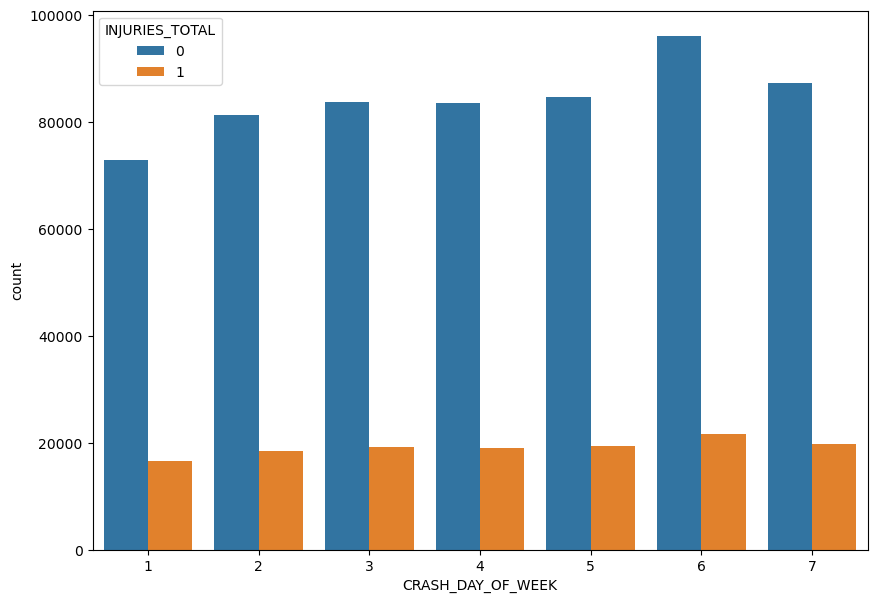

In [43]:
plt.figure(figsize=(10,7))
sns.countplot(x="CRASH_DAY_OF_WEEK", hue="INJURIES_TOTAL", data=modified_data)

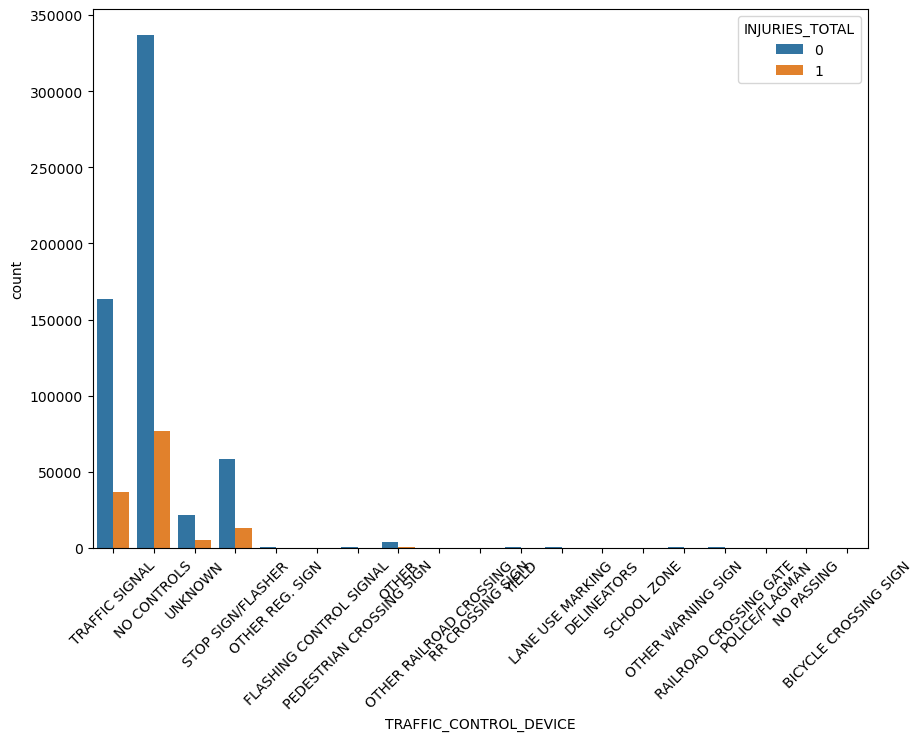

In [44]:
plt.figure(figsize=(10, 7))
ax = sns.countplot(x="TRAFFIC_CONTROL_DEVICE", hue="INJURIES_TOTAL", data=modified_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()


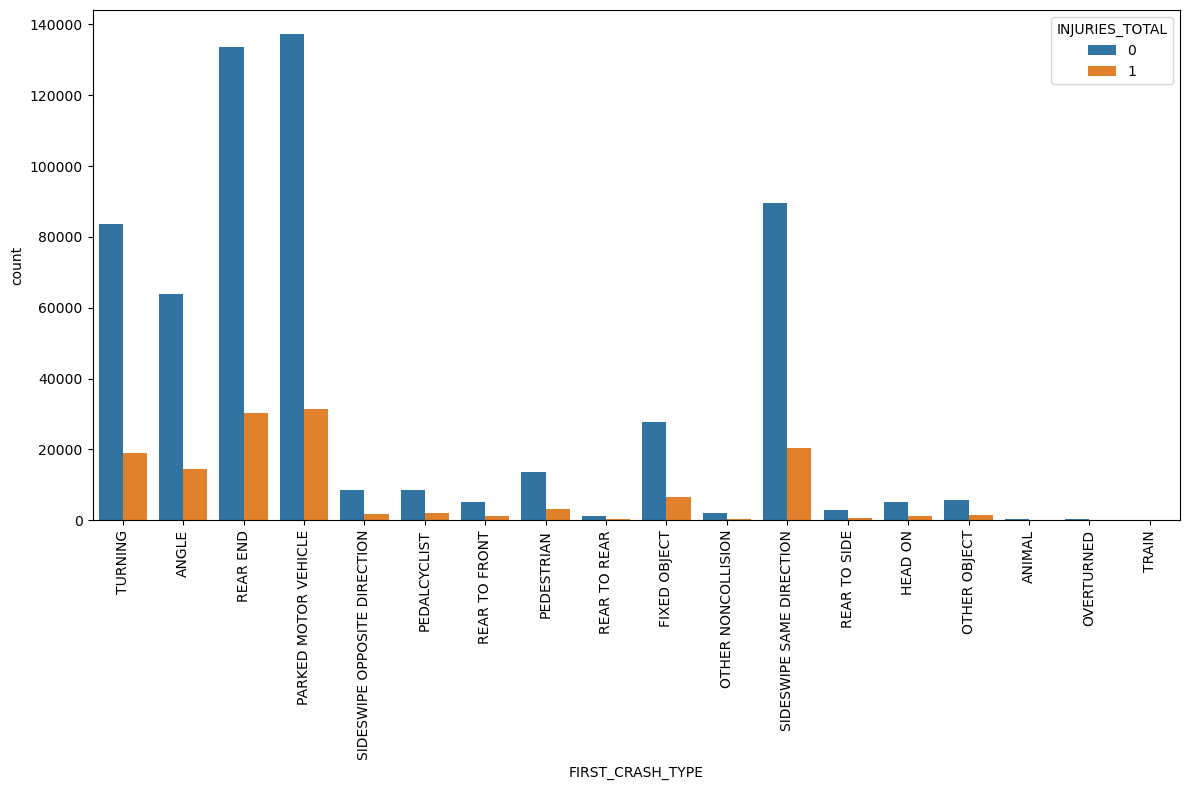

In [45]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x="FIRST_CRASH_TYPE", hue="INJURIES_TOTAL", data=modified_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()


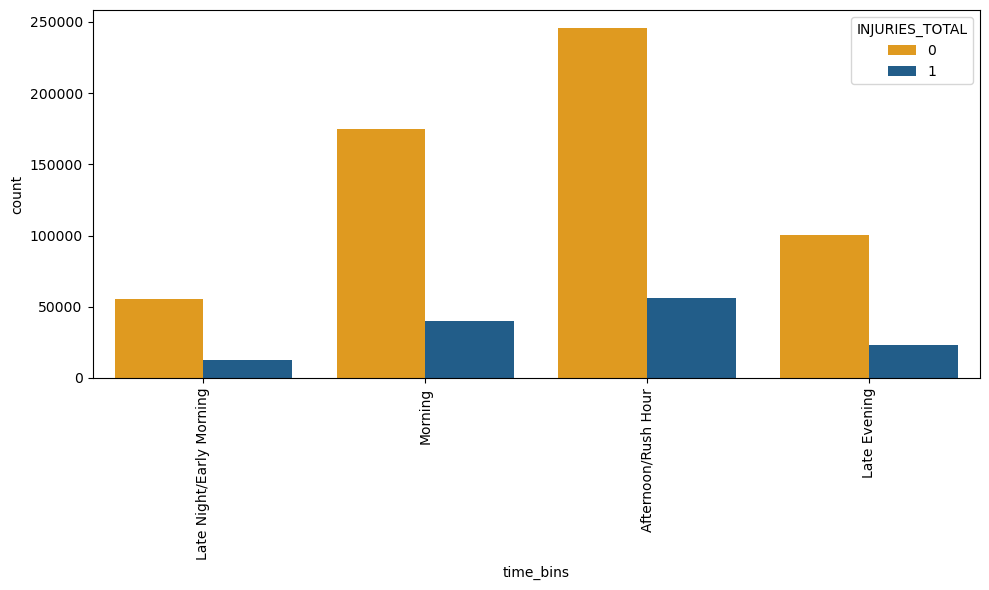

In [50]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x="time_bins", hue="INJURIES_TOTAL", data=modified_data, palette = ["#ffa300", "#115f9a"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()

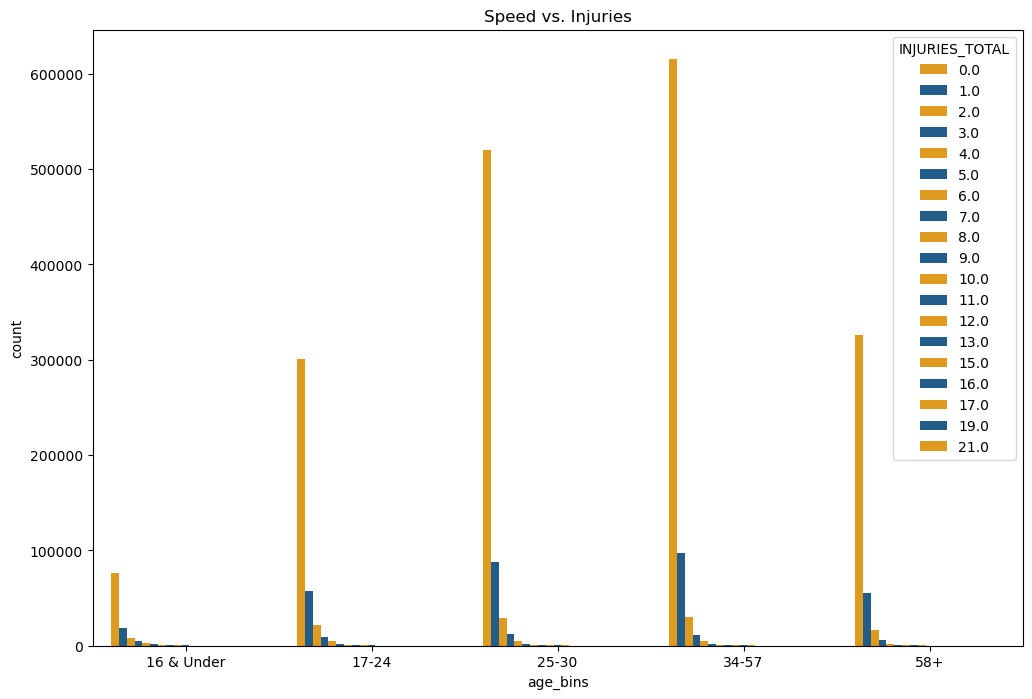

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(x="age_bins", hue="INJURIES_TOTAL", data=merged_data, palette=["#ffa300", "#115f9a"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha = "right")
plt.title('Speed vs. Injuries')

plt.show()


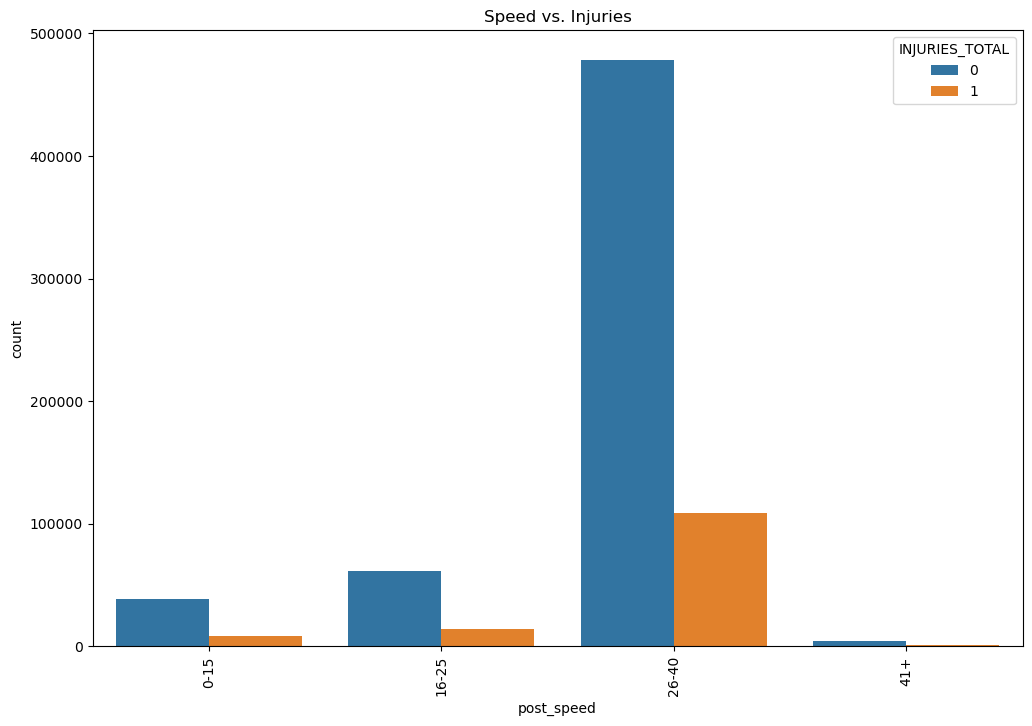

In [49]:
# Plot 1: Order Status vs. Review Score
plt.figure(figsize=(12, 8))
sns.countplot(data=modified_data, x="post_speed", hue = "INJURIES_TOTAL")
plt.title('Speed vs. Injuries')
plt.xticks(rotation=90)
plt.show()


In [52]:
modified_data.describe()

,POSTED_SPEED_LIMIT,STREET_NO,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
count,723460.000000,723460.000000,723455.000000,723460.000000,723460.000000,721895.000000,721895.000000,721895.000000,721895.000000,721895.000000,721895.0,723460.000000,723460.000000,723460.000000,718778.000000,718778.000000
mean,28.378711,3686.487681,1240.500131,2.034483,0.185369,0.001187,0.019981,0.105089,0.059951,2.006160,0.0,13.208307,4.124012,6.605071,41.854622,-87.673490
std,6.235701,2894.088918,705.259660,0.453236,0.388597,0.037441,0.165244,0.417802,0.314383,1.157038,0.0,5.558177,1.979368,3.445962,0.331330,0.672801
min,0.000000,0.000000,111.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,-87.936193
25%,30.000000,1240.000000,713.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,9.000000,2.000000,4.000000,41.781669,-87.721584
50%,30.000000,3200.000000,1211.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,14.000000,4.000000,7.000000,41.874537,-87.673846
75%,30.000000,5600.000000,1822.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,17.000000,6.000000,10.000000,41.924142,-87.633085
max,99.000000,451100.000000,6100.000000,18.000000,1.000000,4.000000,7.000000,21.000000,15.000000,61.000000,0.0,23.000000,7.000000,12.000000,42.022780,0.000000


In [62]:
def split_train_test_data(merged_data, target, test_size=0.25, random_state=42):
    X = merged_data.drop(columns=target)
    y = merged_data[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

In [63]:
# setting X, y for train-test-split
target = 'INJURIES_TOTAL'
# train-test-split, test_size = 25%, random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=42)

In [ ]:
y_train = model.predict(X_train_tf)